# Import necessary library

In [92]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection

In [95]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 3.Data Understanding

In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# 4.Data Preparation

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = le.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])

In [12]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [86]:
i = fraud['Taxable.Income']
i.count()

600

In [97]:
fraud['Taxable.Income'].dtypes

dtype('int64')

In [98]:
for i in range (len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i] <= 30000:
        fraud['Taxable.Income'][i]= 'risky'
    else:
        fraud['Taxable.Income'][i] = 'good'
          
  

In [127]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [101]:
fraud['Taxable.Income'] = le.fit_transform(fraud['Taxable.Income'])

In [102]:
fraud.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int32
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

# 5.Model Building

In [103]:
X = fraud.drop('Taxable.Income',axis = 1)
y = fraud[['Taxable.Income']]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=12)

In [105]:
X_train.shape,y_train.shape

((510, 5), (510, 1))

In [106]:
X_test.shape,y_test.shape

((90, 5), (90, 1))

# 6.Model Training

In [140]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = dt_classifier,param_grid= {'criterion':['gini','entropy'],
                                                        'max_depth':[2,3,4,5,6,7,8,9,10]},cv =2)
grid = gs.fit(X_scaled,y)

In [141]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [109]:
grid.best_score_

0.7949999999999999

In [143]:
from sklearn.tree import DecisionTreeRegressor
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
dt_classifier.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

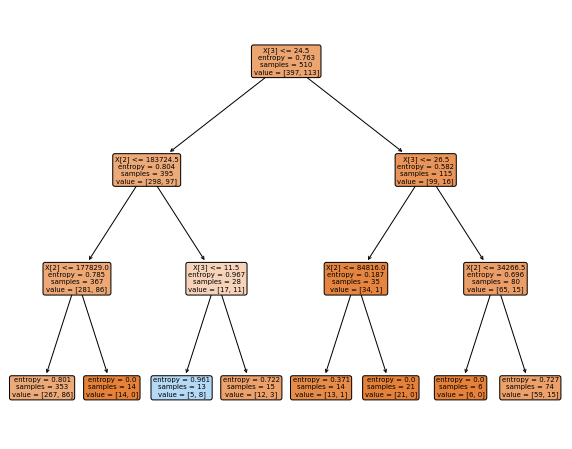

In [111]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10.,8))
plot_tree(dt_classifier,filled=True,rounded=True)
plt.show()

# 7.Model Testing

##### Training data

In [112]:
y_pred_train = dt_classifier.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##### Test data

In [113]:
y_pred_test = dt_classifier.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

## 7. Model Evaluation

In [123]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,roc_auc_score,classification_report

##### Training data

In [131]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('roc_auc_score:',roc_auc_score(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))


accuracy score: 0.7843137254901961
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       397
           1       0.62      0.07      0.13       113

    accuracy                           0.78       510
   macro avg       0.70      0.53      0.50       510
weighted avg       0.75      0.78      0.71       510

roc_auc_score: 0.5291010008693521
confusion matrix:
 [[392   5]
 [105   8]]


##### Test data

In [132]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))


accuracy score: 0.8444444444444444
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        79
           1       0.00      0.00      0.00        11

    accuracy                           0.84        90
   macro avg       0.44      0.48      0.46        90
weighted avg       0.77      0.84      0.80        90

roc_auc_score: 0.4810126582278481
confusion matrix:
 [[76  3]
 [11  0]]


# Using Gini Criterian

In [133]:
dt_classifier_gini = DecisionTreeClassifier(criterion= 'gini', max_depth= 3)
dt_classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

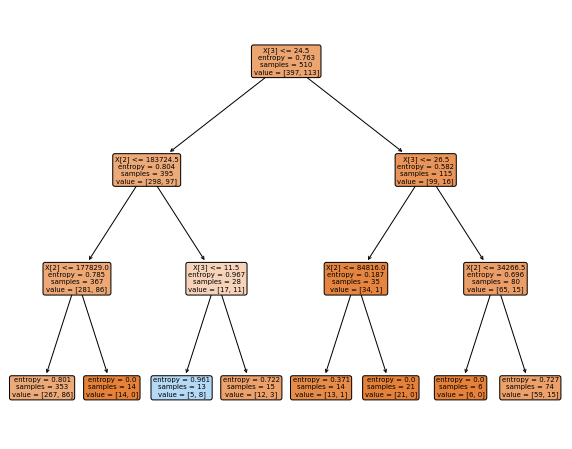

In [134]:
plt.figure(figsize=(10.,8))
plot_tree(dt_classifier,filled=True,rounded=True)
plt.show()

# 7.Model Testing

##### Training data

In [145]:
y_pred_train = dt_classifier_gini.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##### Test data

In [144]:
y_pred_test = dt_classifier_gini.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

## 7. Model Evaluation

In [123]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,roc_auc_score,classification_report

In [146]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('roc_auc_score:',roc_auc_score(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))


accuracy score: 0.7843137254901961
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       397
           1       0.62      0.07      0.13       113

    accuracy                           0.78       510
   macro avg       0.70      0.53      0.50       510
weighted avg       0.75      0.78      0.71       510

roc_auc_score: 0.5291010008693521
confusion matrix:
 [[392   5]
 [105   8]]
